# CS 1656 – Introduction to Data Science (Spring 2017) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Anatoli Shein

### Additional Credits: Zuha Agha
---
In this recitation you will be learning pandas dataframe basics and plotting in Python. Packages you will need are,
* pandas
* matplotlib

First step is to import the packages above. If import fails,it means that the package is not installed. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

For the sake of interactive display in Jupyter, we will enable matplotlib inline (this is only for Jupyter and you should not enable this).

In [2]:
%matplotlib inline

## Dataframe Basics

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table. DataFrame accepts many different kinds of input:
*Dict of 1D ndarrays, lists, dicts, or Series
*2-D numpy.ndarray
*Structured or record ndarray
*A Series
*Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

Now what is a Series?
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). You can think of it as a 1-dimensional dataframe. Series objects can also have index. 
### Creating a Dataframe
We will start off by creating  a dataframe from Weather Undergraound Data retreived from the url below.

In [3]:
df = pd.read_csv('https://www.wunderground.com/history/airport/KPIT/2016/1/1/MonthlyHistory.html?format=1',sep='\\s*,\\s*', engine='python',parse_dates=['EST'])

To display the top 'n' rows of the dataframe, use the head() command below. The default is 5 rows.

In [4]:
df.head()

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2016-01-01                35                 32                29   
1 2016-01-02                36                 31                26   
2 2016-01-03                34                 31                28   
3 2016-01-04                28                 20                12   
4 2016-01-05                27                 17                 7   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  Mean Humidity  \
0              22              19             16            75             61   
1              22              20             18            75             66   
2              26              23             19            85             73   
3              21              12              3            81             63   
4               7               4              1            80             59   

   Min Humidity         ...           Max VisibilityMiles  \
0            47         ...                            10   
1            56         ...                            10   
2            61         ...                            10   
3            45         ...                            10   
4            37         ...                            10   

   Mean VisibilityMiles  Min VisibilityMiles  Max Wind SpeedMPH  \
0                    10                   10                 23   
1                    10                   10                 17   
2                     9                    2                 17   
3                     9                    1                 26   
4                    10                   10                  9   

   Mean Wind SpeedMPH  Max Gust SpeedMPH  PrecipitationIn  CloudCover  Events  \
0                  13                 30                T           7    Snow   
1                   8                 22             0.00           6     NaN   
2                  11                 25             0.01           7    Snow   
3                  13                 31             0.03           6    Snow   
4                   3                 12             0.00           0     NaN   

  WindDirDegrees<br />  
0            260<br />  
1            241<br />  
2            271<br />  
3            341<br />  
4            116<br />  

[5 rows x 23 columns]

Now to find all the column names of the dataframe and their data types, type the following command.

In [5]:
df.dtypes

EST                          datetime64[ns]
Max TemperatureF                      int64
Mean TemperatureF                     int64
Min TemperatureF                      int64
Max Dew PointF                        int64
MeanDew PointF                        int64
Min DewpointF                         int64
Max Humidity                          int64
Mean Humidity                         int64
Min Humidity                          int64
Max Sea Level PressureIn            float64
Mean Sea Level PressureIn           float64
Min Sea Level PressureIn            float64
Max VisibilityMiles                   int64
Mean VisibilityMiles                  int64
Min VisibilityMiles                   int64
Max Wind SpeedMPH                     int64
Mean Wind SpeedMPH                    int64
Max Gust SpeedMPH                     int64
PrecipitationIn                      object
CloudCover                            int64
Events                               object
WindDirDegrees<br />            

Notice the type of 'EST' column. We will find out why that's relevant a few steps later.
### Accessing Dataframe Columns
There are two ways to access a dataframe column. 
The first way is accessing it like a dictionary as shown below. We will be using head function to show the first few rows only.

In [6]:
df['EST'].head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
Name: EST, dtype: datetime64[ns]

The second way is to access using dot. But this only works if the column name is a valid variable name without any spacing.

In [7]:
df.EST.head()

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
Name: EST, dtype: datetime64[ns]

You can also access multiple columns by passing list of column names.

In [8]:
df[['EST','Mean TemperatureF']].head()

EST  Mean TemperatureF
0 2016-01-01                 32
1 2016-01-02                 31
2 2016-01-03                 31
3 2016-01-04                 20
4 2016-01-05                 17

---
## Plotting
### Basic Plot

Now lets start with basic plotting in Python first. We will use the plot function. Note that plot returns a tuple of handle and labels. If you need the plot handle in the future you will assign a variable to the plot function's return value.

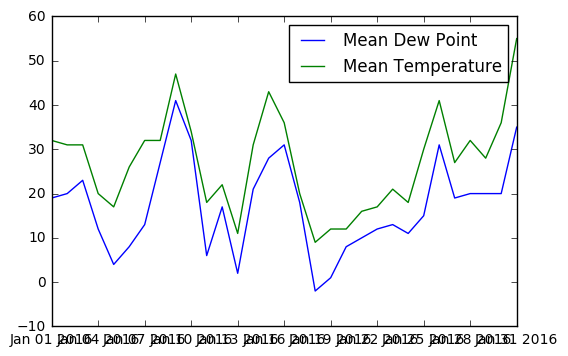

In [9]:
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

That does not look too pretty. Let's format the graph and plot again. 

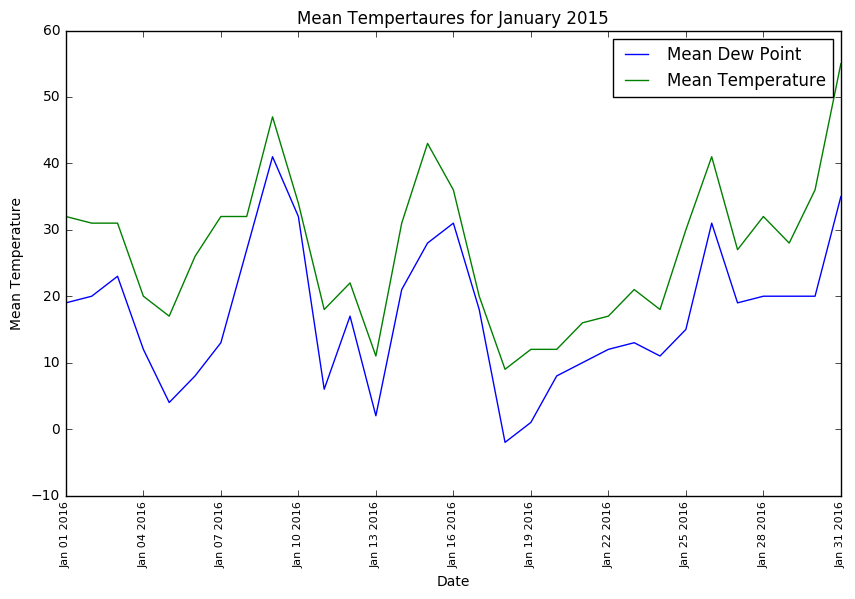

In [10]:
# Initializing a larger figure
fig = plt.figure(figsize=(10, 6))

# PLotting
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

# Formatting graph
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Tempertaures for January 2015')

# Are we ready to show the formatted graph now? Not yet. Because we want
# to save our graph figure this time.In order to use the save command, it
# is important to save before the show command because the show command
# clears the axis of the figure after displaying.

plt.savefig("basic_plot.png")
plt.show()

### Bar Plot

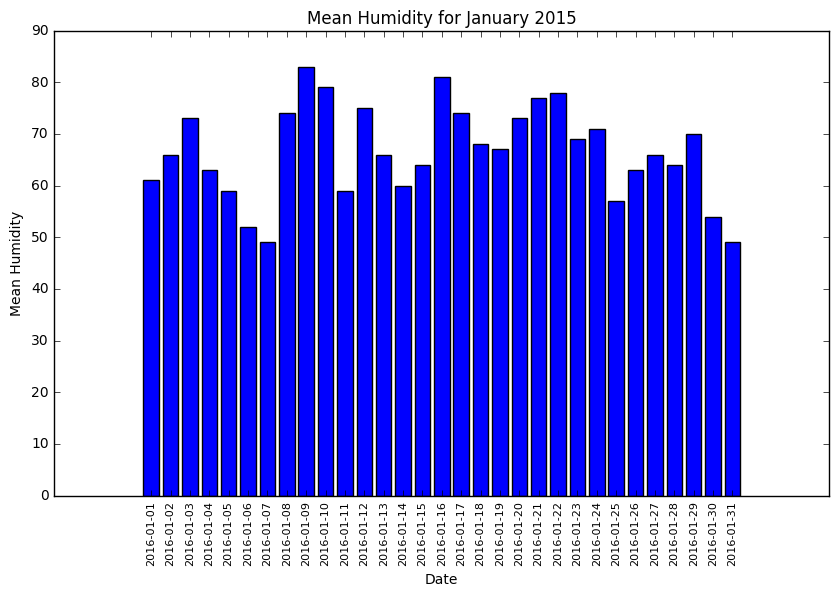

In [11]:
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df['EST'])),df['Mean Humidity'], align = 'center')

# Formatting graph
plt.xticks(range(len(df['EST'])), df['EST'].dt.strftime('%Y-%m-%d'),rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity for January 2015')

plt.savefig("bar_plot.png")
plt.show()

Now, lets try to plot the two graphs above on the same figure using subplots. The code for plotting is the same as that shown above. 

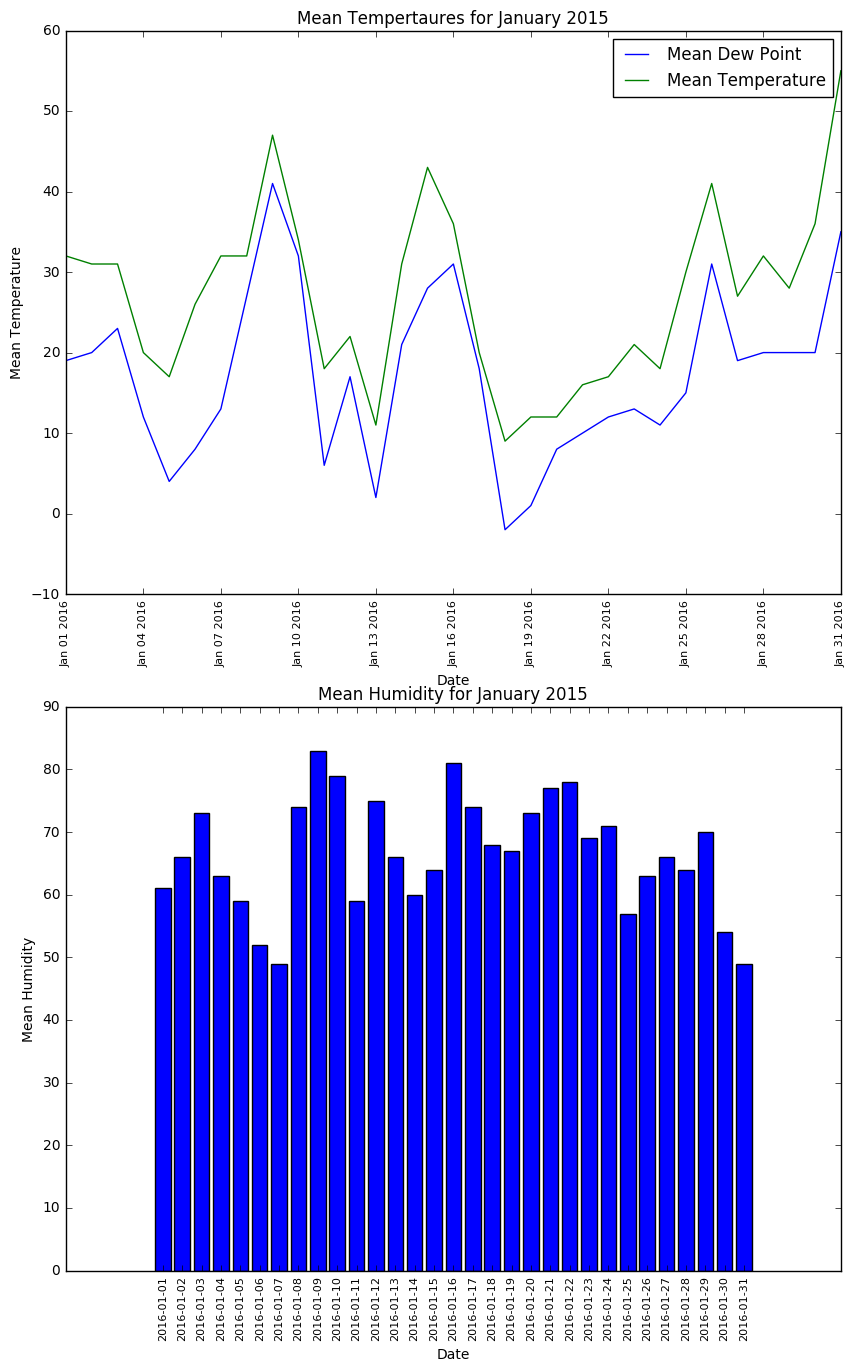

In [12]:
fig = plt.figure(figsize=(10, 16))

# Subplot of basic graph
plt.subplot(211)
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Tempertaures for January 2015')

# Subplot of bar graph graph
plt.subplot(212)
plt.bar(range(len(df['EST'])),df['Mean Humidity'], align = 'center')

plt.xticks(range(len(df['EST'])), df['EST'].dt.strftime('%Y-%m-%d'),rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity for January 2015')

plt.savefig("subplot_basic_bar.png")
plt.show()

What is teh advantage of subplots? It allows us to establish relationships between different variables and different statistics. Looking at the two subplots above, do you notice any relationship?

### Scatter Plot
Scatter plots are commonly used to show correlation between variables. If the data points make a straight line going from the origin out to high x and high y values, then the variables are said to have a positive correlation. If the line goes from a high value on the y-axis down to a high value on the x-axis, the variables have a negative correlation. The closer the data points in the scatter plot, the higher the correlation between the two variables, or the stronger the relationship.

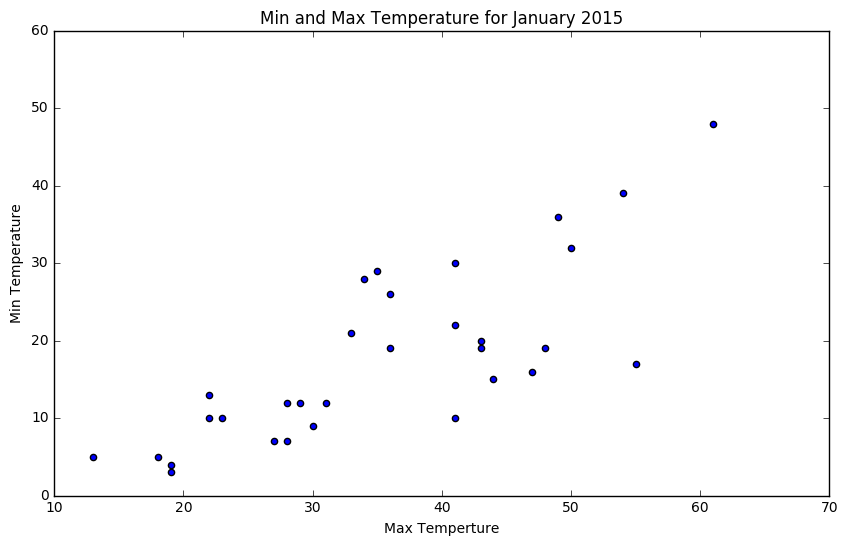

In [13]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(df['Max TemperatureF'],df['Min TemperatureF'])

# Formatting graph
plt.xlabel('Max Temperture')
plt.ylabel('Min Temperature')
plt.title('Min and Max Temperature for January 2015')

plt.savefig("scatter_plot.png")
plt.show()

The graph above shows us that min and max temperature have a strong positive correlation.

## Tasks
For your tasks, the input file is available at http://db.cs.pitt.edu/courses/cs1656/fall2016/top12cities.csv. The file consists of population density estimates and land area of several cities in USA. 

You need to read the file into a dataframe and perform the following three tasks during the recitation. 

**Task 1** 

Plot a scatter plot of with '2014 estimate' on the x-axis and 'land area' on the y-axis. After observing the plot, do you think the two variables are strongly or weakly correlated? Is the correlation positive or negative?

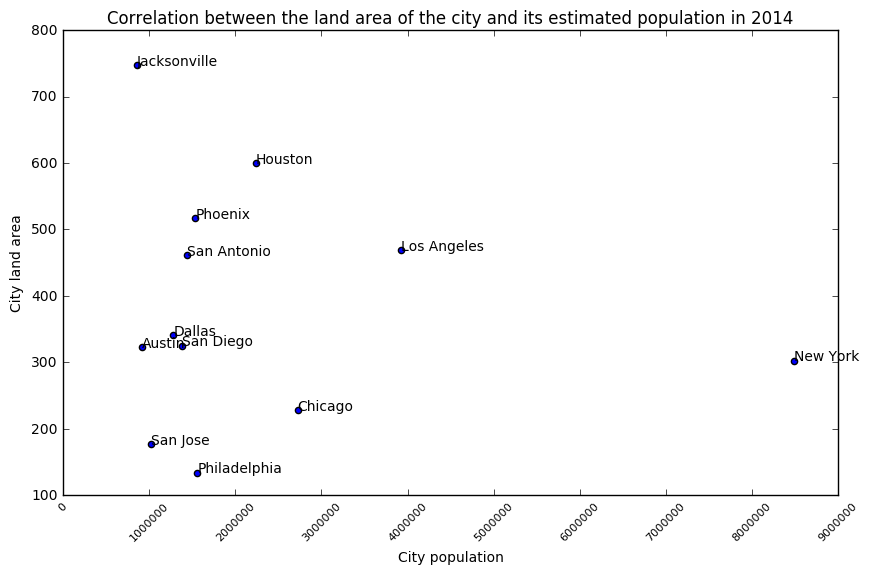

In [25]:
df1 = pd.read_csv('http://db.cs.pitt.edu/courses/cs1656/fall2016/top12cities.csv',sep=',',engine='python')

# Initializing a figure
fig = plt.figure(figsize=(10, 6))

# Plotting
plt.scatter(df1['2014 estimate'],df1['2014 land area'])

# Adding a subplot for labels
ax = fig.add_subplot(111)
i = 0
for xy in zip(df1['2014 estimate'],df1['2014 land area']):
    ax.annotate(df1['City'][i], xy, textcoords='data')
    i+=1

# Formatting graph
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel('City population')
plt.ylabel('City land area')
plt.title('Correlation between the land area of the city and its estimated population in 2014')

plt.show()

**Task 2** 

Plot a bar plot showing each city's 2014 population estimate given by '2014 estimate' column. 

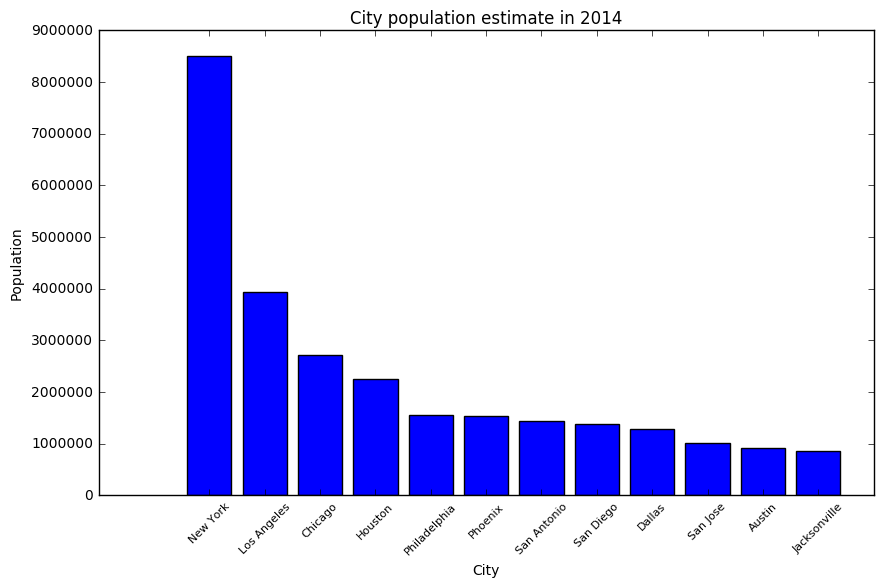

In [15]:
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df1['City'])),df1['2014 estimate'], align = 'center')

# Formatting graph
plt.xticks(range(len(df1['City'])),df1['City'], rotation = 45, fontsize = 8)
plt.xlabel('City')
plt.ylabel('Population')
plt.title('City population estimate in 2014')

plt.show()

**Task 3** 

Now that you plotted a simple bar plot, try plotting a grouped bar plot that shows both 2010 and 2014 estimate for each city on the same plot. This means that there will be two grouped bars per city on your graph. 

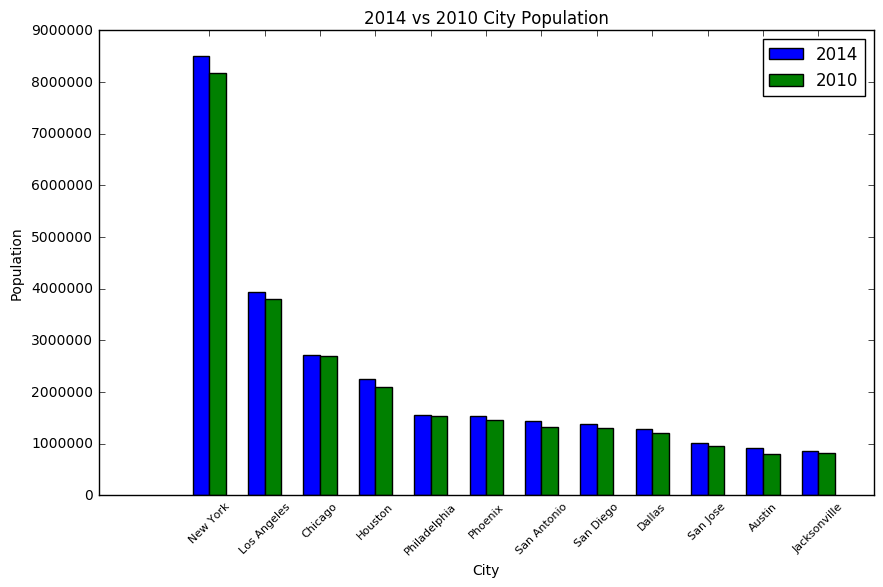

In [16]:
import numpy as np

fig = plt.figure(figsize=(10, 6))

x = np.arange(len(df1['City']))
y1 = df1['2014 estimate']
y2 = [int(i.replace(',','')) for i in df1['2010 Census']]

ax = plt.subplot(111)
ax1 = ax.bar(x-0.15, y1,width=0.3,color='b',align='center')
ax2 = ax.bar(x+0.15, y2,width=0.3,color='g',align='center')

# Formatting graph
plt.xticks(range(len(df1['City'])),df1['City'], rotation = 45, fontsize = 8)
plt.xlabel('City')
plt.ylabel('Population')
plt.title('2014 vs 2010 City Population')
plt.legend([ax1[0],ax2[0]], ['2014', '2010'])

plt.show()